# Unzipping Data:

In [1]:
import zipfile

In [2]:
train_data_zip = './train.ft.txt.bz2.zip'
test_data_zip = './test.ft.txt.bz2.zip'

In [3]:
with zipfile.ZipFile(train_data_zip, 'r') as zip_ref:
    zip_ref.extractall('./')

In [4]:
with zipfile.ZipFile(test_data_zip, 'r') as zip_ref:
    zip_ref.extractall('./')

In [5]:
import bz2

# Extracting Data:

In [6]:
import pandas as pd

In [7]:
train_data = './train.ft.txt.bz2'
test_data = './test.ft.txt.bz2'

In [8]:
with bz2.open(train_data, 'rt', encoding='utf-8') as train_file:
    data = train_file.readlines()

df_train = pd.DataFrame(data, columns=['text'])

In [9]:
df_train[:1].values

array([['__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n']],
      dtype=object)

# Data Transformation:

In [10]:
df_train['class'] = df_train['text'].apply(lambda x: 2 if '__label__2' in x else 1)

In [11]:
df_train

,text,class
0,__label__2 Stuning even for the non-gamer: Thi...,2
1,__label__2 The best soundtrack ever to anythin...,2
2,__label__2 Amazing!: This soundtrack is my fav...,2
3,__label__2 Excellent Soundtrack: I truly like ...,2
4,"__label__2 Remember, Pull Your Jaw Off The Flo...",2
...,...,...
3599995,__label__1 Don't do it!!: The high chair looks...,1
3599996,"__label__1 Looks nice, low functionality: I ha...",1
3599997,"__label__1 compact, but hard to clean: We have...",1
3599998,__label__1 what is it saying?: not sure what t...,1


In [12]:
df_train['title'] = df_train['text'].apply(lambda x: x.split(':')[0])

In [13]:
df_train['description'] = df_train['text'].apply(lambda x: x.split(':')[1])

In [14]:
df_train

,text,class,title,description
0,__label__2 Stuning even for the non-gamer: Thi...,2,__label__2 Stuning even for the non-gamer,This sound track was beautiful! It paints the...
1,__label__2 The best soundtrack ever to anythin...,2,__label__2 The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this...
2,__label__2 Amazing!: This soundtrack is my fav...,2,__label__2 Amazing!,This soundtrack is my favorite music of all t...
3,__label__2 Excellent Soundtrack: I truly like ...,2,__label__2 Excellent Soundtrack,I truly like this soundtrack and I enjoy vide...
4,"__label__2 Remember, Pull Your Jaw Off The Flo...",2,"__label__2 Remember, Pull Your Jaw Off The Flo...","If you've played the game, you know how divin..."
...,...,...,...,...
3599995,__label__1 Don't do it!!: The high chair looks...,1,__label__1 Don't do it!!,The high chair looks great when it first come...
3599996,"__label__1 Looks nice, low functionality: I ha...",1,"__label__1 Looks nice, low functionality",I have used this highchair for 2 kids now and...
3599997,"__label__1 compact, but hard to clean: We have...",1,"__label__1 compact, but hard to clean","We have a small house, and really wanted two ..."
3599998,__label__1 what is it saying?: not sure what t...,1,__label__1 what is it saying?,not sure what this book is supposed to be. It...


In [15]:
df_train = df_train.drop('text', axis=1)

In [16]:
df_train

,class,title,description
0,2,__label__2 Stuning even for the non-gamer,This sound track was beautiful! It paints the...
1,2,__label__2 The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this...
2,2,__label__2 Amazing!,This soundtrack is my favorite music of all t...
3,2,__label__2 Excellent Soundtrack,I truly like this soundtrack and I enjoy vide...
4,2,"__label__2 Remember, Pull Your Jaw Off The Flo...","If you've played the game, you know how divin..."
...,...,...,...
3599995,1,__label__1 Don't do it!!,The high chair looks great when it first come...
3599996,1,"__label__1 Looks nice, low functionality",I have used this highchair for 2 kids now and...
3599997,1,"__label__1 compact, but hard to clean","We have a small house, and really wanted two ..."
3599998,1,__label__1 what is it saying?,not sure what this book is supposed to be. It...


In [17]:
df_train.description.values[:1]

array([' This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n'],
      dtype=object)

In [18]:
df_train['title'] = df_train['title'].apply(lambda x: x[11:])

In [19]:
df_train

,class,title,description
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this...
2,2,Amazing!,This soundtrack is my favorite music of all t...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy vide...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divin..."
...,...,...,...
3599995,1,Don't do it!!,The high chair looks great when it first come...
3599996,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and...
3599997,1,"compact, but hard to clean","We have a small house, and really wanted two ..."
3599998,1,what is it saying?,not sure what this book is supposed to be. It...


## OR

### We can do this too creating a function

In [20]:
# This code will do the same operation. But more effectively and increase the code reusability.

In [21]:
def data_extract(filelink):
    with bz2.open(train_data, 'rt', encoding='utf-8') as train_file:
        data = train_file.readlines()
        df = pd.DataFrame(data, columns=['text'])
    return df

In [22]:
# data_train = data_extract('./train.ft.txt.bz2') since, we already extracted above

In [23]:
def data_transform(data):
    processed_data = pd.DataFrame(data, columns=['text'])
    processed_data['class'] = processed_data['text'].apply(lambda x: 2 if '__label__2' in x else 1)
    processed_data['title'] = processed_data['text'].apply(lambda x: x.split(':')[0])
    processed_data['description'] = processed_data['text'].apply(lambda x: x.split(':')[1])
    processed_data = processed_data.drop('text', axis=1)
    processed_data['title'] = processed_data['title'].apply(lambda x: x[11:])
    return processed_data

In [24]:
# data_train = data_transform(data_train)

In [25]:
# data_train[:5] # we can do same with the test data.

In [26]:
df_train['class'].value_counts()

class
2    1800000
1    1800000
Name: count, dtype: int64

# Data reduction or Data subsampling

In [27]:
# Performed due to high amount of data and my laptop taking way too longer to processed it.

In [28]:
n = int(1800000*0.01)

In [29]:
n

18000

In [30]:
from sklearn.utils import shuffle

In [31]:
class_2 = df_train[df_train['class'] == 2].sample(n=n, random_state=1)

In [32]:
class_1 = df_train[df_train['class'] == 1].sample(n=n, random_state=1)

In [33]:
balanced_data = pd.concat([class_2, class_1])

In [34]:
shuffled_data = shuffle(balanced_data, random_state=1)

In [35]:
shuffled_data.head()

,class,title,description
373990,2,Very educational.,I have learned so much about playing poker fr...
3315074,1,Lots of tiny stones.,Sadly I found lots of tiny stones in the batc...
1937421,1,Lock Fail,Used 5 or 6 times on my gym bag on visits to ...
2745110,1,wrong description,"I loved the original version, but the DVD the..."
2758823,1,"Missing all diagrams, but alright otherwise","I enjoy taxidermy as a semi-hobby, and was pr..."


In [36]:
shuffled_data['class'].value_counts()

class
2    18000
1    18000
Name: count, dtype: int64

In [37]:
df_train = shuffled_data.copy()

# Text Preprocessing

In [38]:
!pip install nltk

In [39]:
import nltk

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords

In [42]:
from nltk.stem import WordNetLemmatizer

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
lemmatizer = WordNetLemmatizer()

In [46]:
stop_words = set(stopwords.words('english'))

In [47]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

In [48]:
df_train['tokens'] = df_train['description'].apply(preprocess_text) # Takes lots of time to process

In [49]:
all_words = ' '.join([' '.join(tokens) for tokens in df_train['tokens']])

# Feature Extraction

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf_vectorizer = TfidfVectorizer()

In [52]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df_train['description'])

In [53]:
df_train['TF_IDF_Score'] = tfidf_matrix.sum(axis=1)

In [54]:
df_train.head(5)

,class,title,description,tokens,TF_IDF_Score
373990,2,Very educational.,I have learned so much about playing poker fr...,"[learned, much, playing, poker, book, hopefull...",3.211978
3315074,1,Lots of tiny stones.,Sadly I found lots of tiny stones in the batc...,"[sadly, found, lot, tiny, stone, batch, quinoa...",5.943736
1937421,1,Lock Fail,Used 5 or 6 times on my gym bag on visits to ...,"[used, time, gym, bag, visit, excercise, broke...",3.902499
2745110,1,wrong description,"I loved the original version, but the DVD the...","[loved, original, version, dvd, sent, careful,...",4.671485
2758823,1,"Missing all diagrams, but alright otherwise","I enjoy taxidermy as a semi-hobby, and was pr...","[enjoy, taxidermy, pretty, excited, saw, book,...",5.280737


# Word Embeddings

In [55]:
from gensim.models import Word2Vec

In [56]:
w2v_model = Word2Vec(sentences=df_train['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [57]:
vector_input = 'returned'

In [58]:
vector = w2v_model.wv[vector_input]

In [59]:
print(f"Vector for {vector_input}:", vector)

Vector for returned: [ 0.34315613 -0.09190998  0.09130273  0.44676766 -0.0516372  -0.97285444
  0.4584555   1.5446787  -0.68974507  0.81908417 -0.07089542 -0.28572127
  0.10834298  0.49439886 -0.15589574 -0.40023538  0.5962086  -0.81196773
 -0.7495579  -1.6879767   1.0316243   0.25241658  1.1296004  -1.5159136
 -1.004179   -0.925379   -1.1064539  -1.5268638  -0.95967263 -0.12694696
  0.77671325 -0.90908676  1.8089061  -0.64716995 -0.34906816  0.75263155
  0.43501318 -0.4046023  -0.5338405  -1.7945862   0.30642658 -0.6892458
  0.5761139   0.18972206 -0.23531623 -0.3974575  -0.68860114 -0.15179768
  1.5113381   0.87058353 -0.06442767 -0.8620154   0.00689368 -0.38695866
 -0.6270403   0.9186573  -0.7874137  -0.6311864  -1.9829799  -1.2571092
  0.07992174  0.9925822  -0.7600794   0.44375175  0.7692408   1.2118014
  0.4182889  -0.21601473 -1.0561916   0.4568529  -1.5232464  -0.45501992
  1.0518978  -0.4357449  -0.4138851  -0.03198354  0.36123052  1.1689066
 -1.1744907   0.25324354  0.0769175

In [60]:
similar_words = w2v_model.wv.most_similar(vector_input, topn=5)

In [61]:
print(f"Similar words to {vector_input}: {similar_words}")

Similar words to returned: [('defective', 0.9693273901939392), ('shipped', 0.9398346543312073), ('receive', 0.9369714260101318), ('returning', 0.9345656037330627), ('replacement', 0.9335728287696838)]


# Sentimental Analysis

In [62]:
from textblob import TextBlob

In [63]:
# def sentimental_analysis(x):
#     SA = TextBlob(x)
#     return str(SA.sentiment.polarity)

# df_train['Sentiment_score'] = data_train['description'].apply(sentimental_analysis)

### OR

In [64]:
df_train['Sentiment_score'] = df_train['description'].apply(lambda i: TextBlob(i).sentiment.polarity)

In [65]:
df_train['Sentiment_updated'] = df_train.Sentiment_score.apply(
    lambda x: "2" if x >= 0
    else "1"
)

# 2 == Positive
# 1 == Negative 

In [66]:
df_train.sample(5)

,class,title,description,tokens,TF_IDF_Score,Sentiment_score,Sentiment_updated
2142495,1,The sound of six hands wanking,"My first rock concert was seeing Emerson, Lak...","[first, rock, concert, seeing, emerson, lake, ...",8.247726,0.344167,2
2195460,1,Judgement!!!,The only thing I have to say from just lookin...,"[thing, say, looking, preview]",3.033860,0.000000,2
927906,1,out of date and too small to be useful,"This dictonary is about 40 years out of date,...","[dictonary, year, date, missing, basic, japane...",4.552294,0.068750,2
1841114,1,Dockers has inferior buttons,The last six Dockers products I purchased all...,"[last, six, docker, product, purchased, button...",4.592962,-0.100000,1
3232138,2,Not the usual teen movie,Jennifer's Body is a twist on the usual teen ...,"[jennifer, body, twist, usual, teen, scary, mo...",6.723478,0.070833,2


# Visualization

In [67]:
import matplotlib.pyplot as plt

In [68]:
import seaborn as sns

In [69]:
from wordcloud import WordCloud

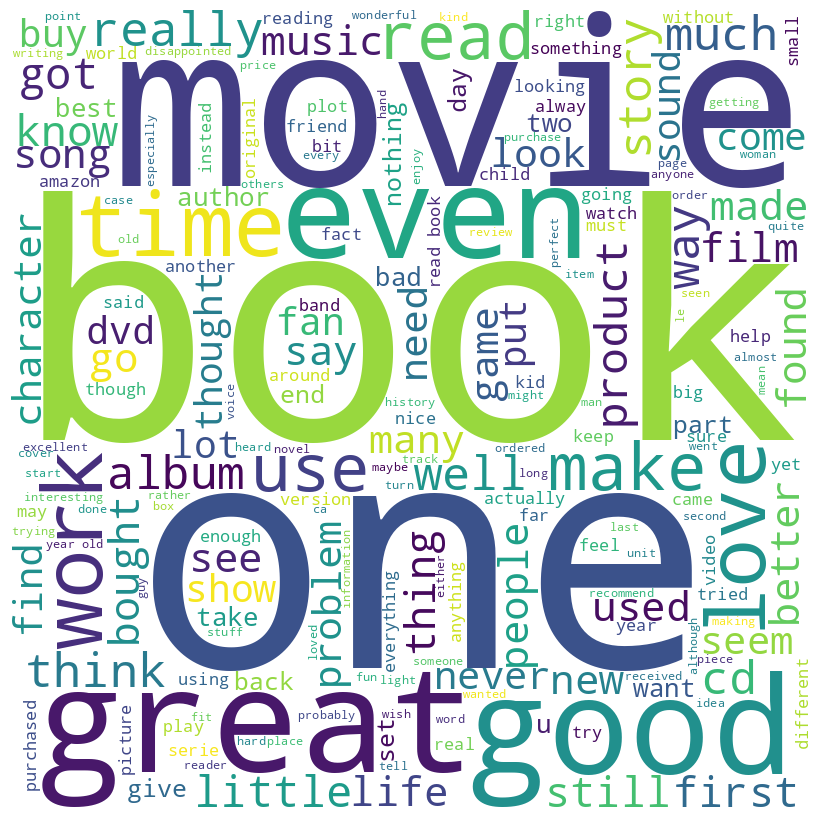

In [70]:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(all_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

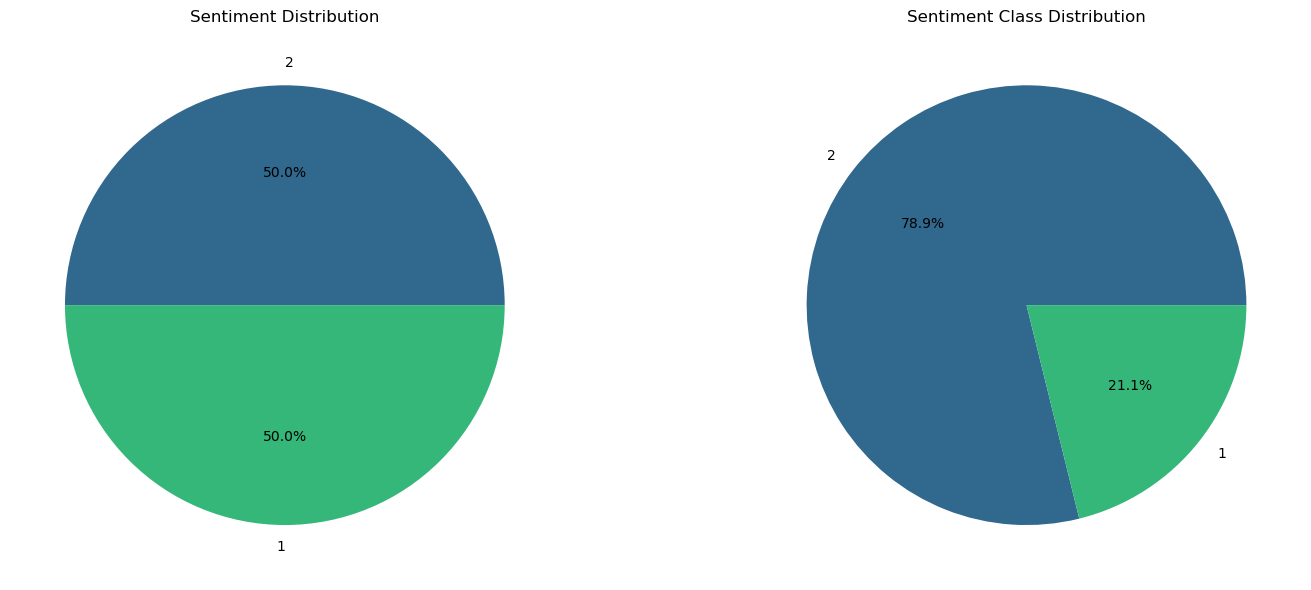

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sentiment_counts = df_train['class'].value_counts()
sentiment_class_counts = df_train['Sentiment_updated'].value_counts()
axes[0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(sentiment_counts)))
axes[0].set_title('Sentiment Distribution')
axes[1].pie(sentiment_class_counts, labels=sentiment_class_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(sentiment_class_counts)))
axes[1].set_title('Sentiment Class Distribution')
plt.tight_layout()
plt.show()

```Python

CHATGPT:
    
To determine which column to use for training and to assess the risk of underfitting or bias in your model, let's break down the considerations based on the provided pie charts.

Sentiment Analysis Columns: It seems like you have two columns:

A sentiment column (possibly labeled as 1 or 2, referring to positive or negative sentiment).

A sentiment class column, which you mentioned was derived using TextBlob.


Choosing the Column:

If you are planning to train a model for sentiment classification, the sentiment class column generated by TextBlob is likely a good starting point. 

This is because it represents the sentiment as analyzed by an established tool, giving you a labeled outcome for training.

However, if you have another column with sentiment values (like raw sentiment scores or polarity scores), it could also be used if it has a meaningful range (e.g., continuous values).

Risk of Underfitting and Bias:

    
Bias: From your pie chart, the second distribution (right pie chart) shows a clear imbalance, with about 79.2% of one class and 20.8% of the other. This could make the model biased towards the dominant class, potentially resulting in lower accuracy for the minority class.

Underfitting: If the features used to train the model are not adequately representative of the text's content, it could lead to underfitting. Ensure that you use well-processed features (such as TF-IDF or word embeddings) to capture the nuances of the text.
Recommendations:

Balance the Classes: You may want to apply techniques to balance the dataset, such as oversampling the minority class or undersampling the majority class.

Feature Engineering: Use meaningful features like TF-IDF, word embeddings, or BERT embeddings, rather than a single sentiment score alone, to help capture the text's full context.

    
Evaluation: Once you train the model, evaluate it on separate validation and test sets to monitor if it's overly biased towards the majority class or if it's underfitting (indicated by low performance across classes).


```

# Data Imbalancing:

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
smote = SMOTE(random_state=42)

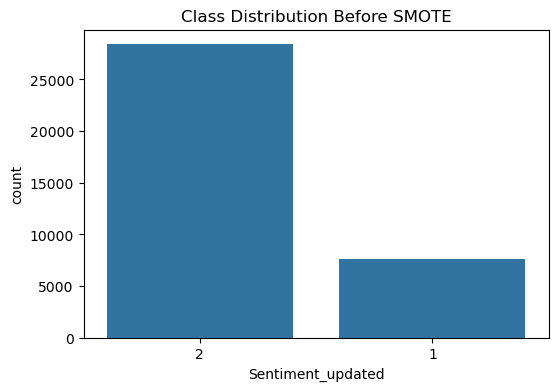

In [76]:
plt.figure(figsize=(6,4))
sns.countplot(x=df_train.Sentiment_updated) 
plt.title("Class Distribution Before SMOTE")
plt.show()

In [77]:
X = df_train['description']

In [78]:
y = df_train.Sentiment_updated

In [79]:
vectorizer = CountVectorizer()

In [80]:
X_vectorized = vectorizer.fit_transform(X)

In [81]:
X_balanced, y_balanced = smote.fit_resample(X_vectorized, y)

In [82]:
X_balanced, y_balanced

(<56776x62846 sparse matrix of type '<class 'numpy.int64'>'
 	with 3134762 stored elements in Compressed Sparse Row format>,
 0        2
 1        2
 2        2
 3        2
 4        1
         ..
 56771    1
 56772    1
 56773    1
 56774    1
 56775    1
 Name: Sentiment_updated, Length: 56776, dtype: object)

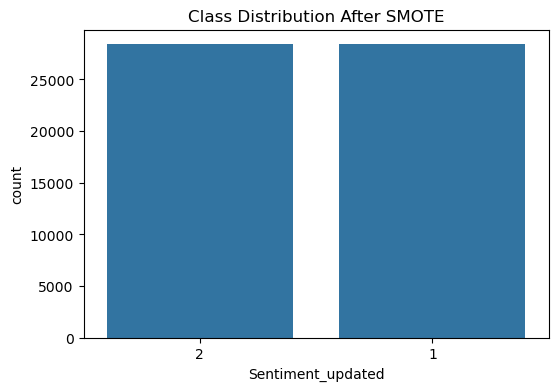

In [83]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_balanced) 
plt.title("Class Distribution After SMOTE")
plt.show()

# Machine Learning

## Training:

In [84]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [86]:
from sklearn import svm

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

 ```Python
    
Multinomial Naive Bayes is suitable for binary classification tasks, where you have two classes. It works particularly well for text classification problems because it assumes that the features (e.g., words in a document) are distributed according to a multinomial distribution.
    
```

In [88]:
mnb = MultinomialNB()

In [89]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [90]:
y_pred_mnb = mnb.predict(X_test)

In [91]:
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))

Accuracy: 0.8732828460725608


<AxesSubplot:title={'center':'Confusion Matrix for MNB: '}>

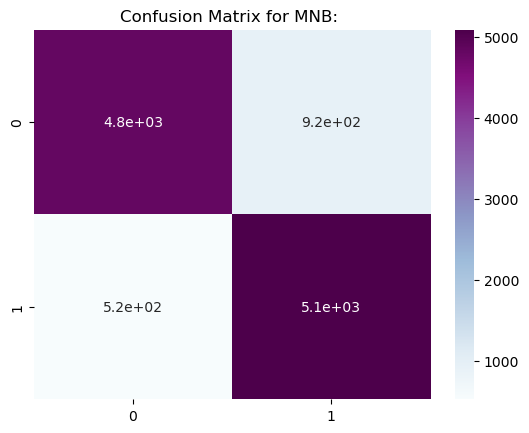

In [92]:
plt.title('Confusion Matrix for MNB: ')
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, cmap='BuPu')

```Python

Support Vector Machines (SVM) is a powerful classification algorithm that works well for binary (two-class) classification tasks.

```

In [93]:
# Ignoring SVM as it takes lots of time to load.

In [94]:
# svm = svm.SVC()

In [95]:
# svm.fit(X_train, y_train)

In [96]:
# y_pred_svm = svm.predict(X_test)

In [97]:
# print("Accuracy:", accuracy_score(y_test, y_pred_svm))

In [98]:
# plt.title('Confusion Matrix for SVM: ')
# sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='BuPu')

In [99]:
# accuracy_scores = [
#     {'Model': 'MNB', 'Accuracy Score': accuracy_score(y_test, y_pred_mnb)},
#     {'Model': 'SVM', 'Accuracy Score': accuracy_score(y_test, y_pred_svm)},
# ]

# accuracy_df = pd.DataFrame(accuracy_scores).sort_values(by='Accuracy Score', ascending=False)
# accuracy_df.head()

In [100]:
# accuracy_df.plot(kind='bar')

# Saving Model

In [101]:
import joblib

In [102]:
joblib.dump(mnb,'mnb_model.pkl')

['mnb_model.pkl']

In [103]:
X

373990      I have learned so much about playing poker fr...
3315074     Sadly I found lots of tiny stones in the batc...
1937421     Used 5 or 6 times on my gym bag on visits to ...
2745110     I loved the original version, but the DVD the...
2758823     I enjoy taxidermy as a semi-hobby, and was pr...
                                 ...                        
3054831     Suncast patio seat arrived quickly and in exc...
1966226     This is a great watch however I bought two so...
2719949     The best about this phone is dual card slots,...
3379033     This movie has awesome fighting scenes...all ...
3164877     This is the public-domain C K Scott Moncrieff...
Name: description, Length: 36000, dtype: object

In [104]:
# joblib.dumps(svm,'svm_model.pkl')

## Testing or Prediction:

In [105]:
df_test = data_extract(test_data)

In [106]:
df_test = data_transform(df_test)

In [107]:
df_test

,class,title,description
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this...
2,2,Amazing!,This soundtrack is my favorite music of all t...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy vide...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divin..."
...,...,...,...
3599995,1,Don't do it!!,The high chair looks great when it first come...
3599996,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and...
3599997,1,"compact, but hard to clean","We have a small house, and really wanted two ..."
3599998,1,what is it saying?,not sure what this book is supposed to be. It...


In [108]:
X_test = df_test['description']  

In [109]:
X_test_vec = vectorizer.transform(X_test)

In [110]:
predictions = mnb.predict(X_test_vec)

In [111]:
predictions

array(['2', '2', '2', ..., '2', '2', '2'], dtype='<U1')

In [112]:
X_test = pd.DataFrame(X_test)

In [113]:
X_test

,description
0,This sound track was beautiful! It paints the...
1,I'm reading a lot of reviews saying that this...
2,This soundtrack is my favorite music of all t...
3,I truly like this soundtrack and I enjoy vide...
4,"If you've played the game, you know how divin..."
...,...
3599995,The high chair looks great when it first come...
3599996,I have used this highchair for 2 kids now and...
3599997,"We have a small house, and really wanted two ..."
3599998,not sure what this book is supposed to be. It...


In [114]:
len(X_test)

3600000

In [115]:
len(predictions)

3600000

In [116]:
if len(predictions) == len(X_test):
    X_test['prediction'] = predictions
else:
    print("Error: Length of predictions does not match number of rows in X_test.")

In [117]:
X_test.sample(5)

,description,prediction
3129402,This book was so scatterbrained that unless y...,1
1926613,I have been through 6 of these faucet mounts ...,2
2642789,I've owned mine for maybe three months. Twice...,2
809486,Unfortunately I read his book 'Blink' and the...,2
695133,This is probably one of the worst books that ...,2


In [118]:
# Done